In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import math
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv")

In [3]:
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [5]:
df.shape

(100000, 20)

In [6]:
df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,4.476070,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
std,28867.657797,11.244121,2.869336,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,50000.500000,41.000000,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,75000.250000,51.000000,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,100000.000000,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000


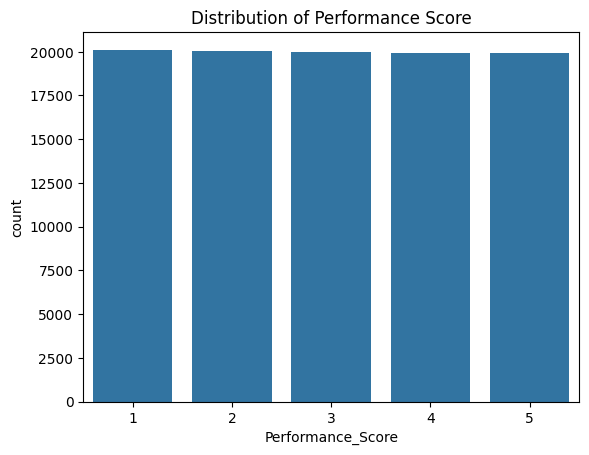

In [7]:
sns.countplot(data=df, x="Performance_Score")
plt.title("Distribution of Performance Score")
plt.show()

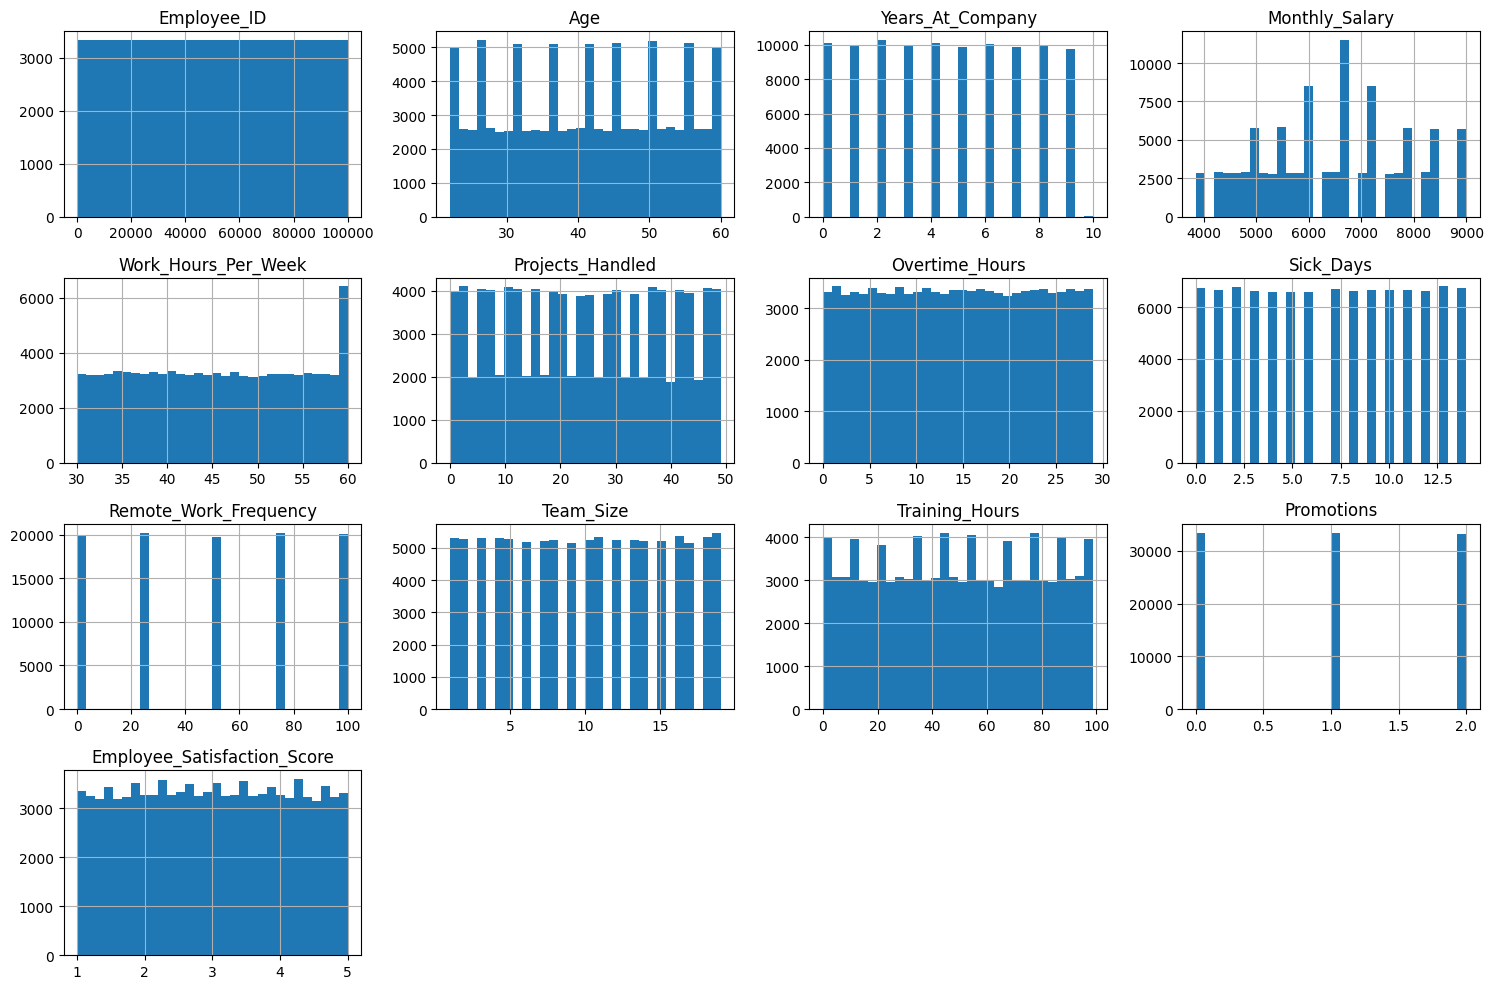

In [8]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop("Performance_Score") 

df[num_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

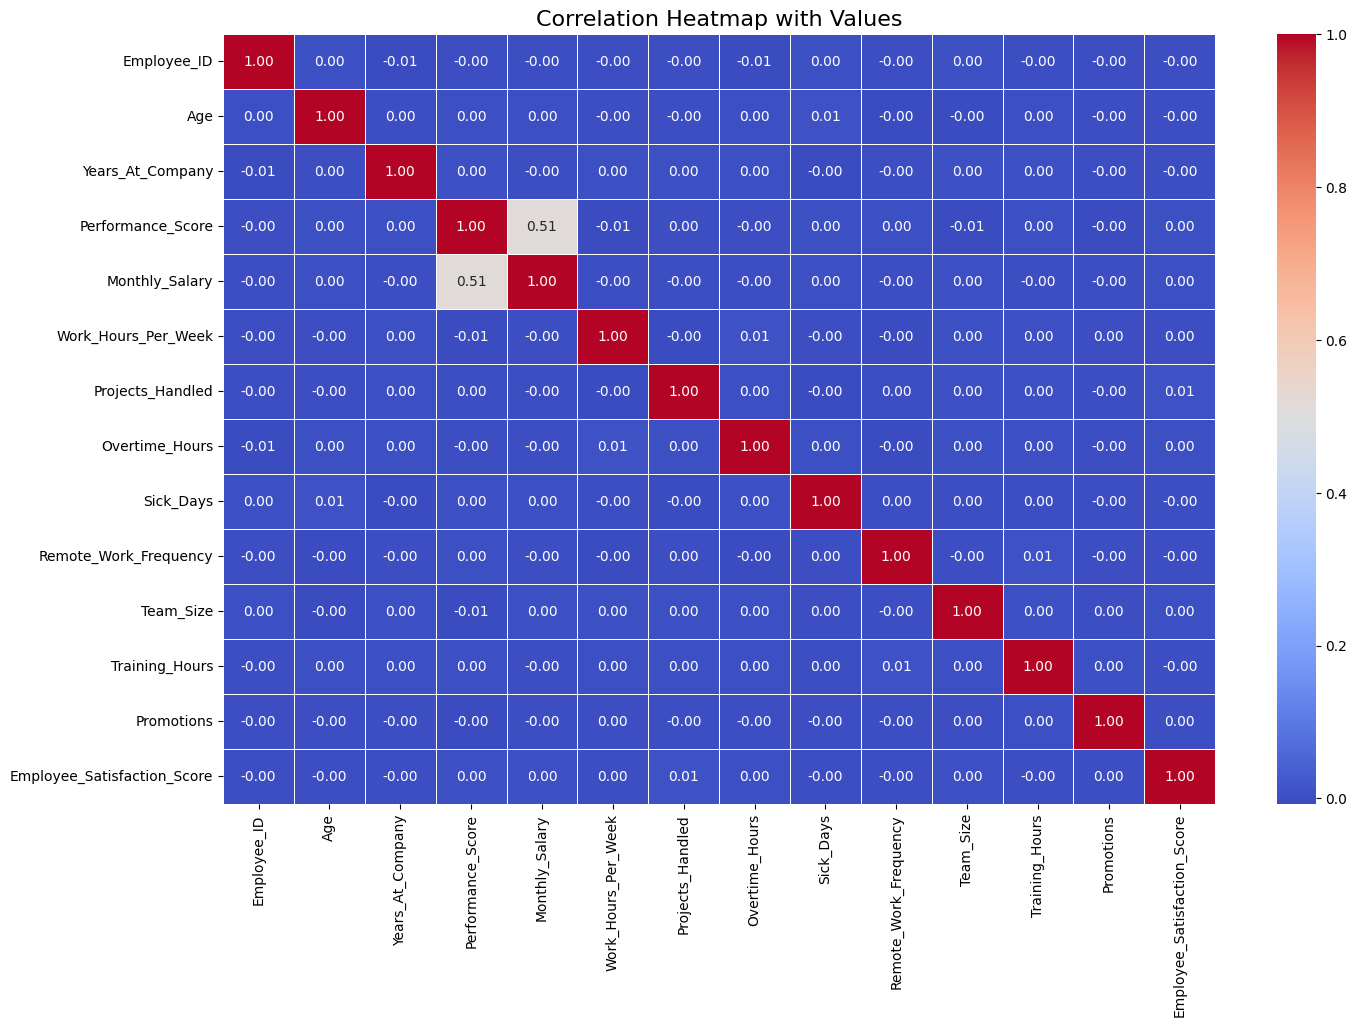

In [9]:
plt.figure(figsize=(16, 10))
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap with Values", fontsize=16)
plt.show()

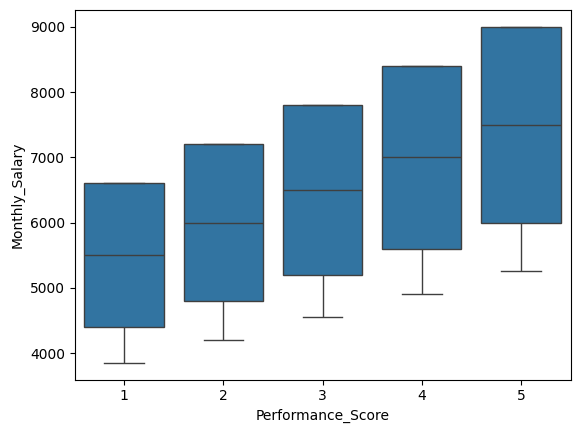

In [10]:
sns.boxplot(data=df, x="Performance_Score", y="Monthly_Salary")
plt.show()

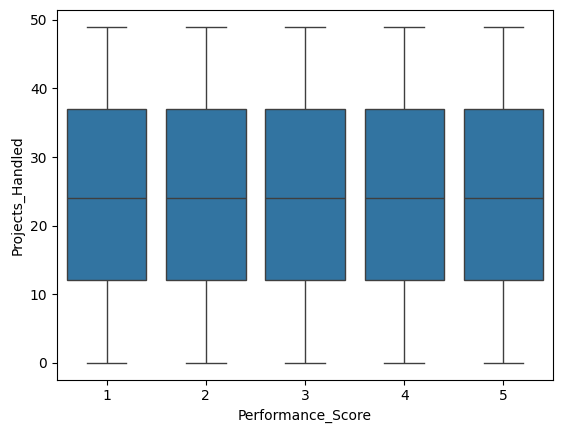

In [11]:
sns.boxplot(data=df, x="Performance_Score", y="Projects_Handled")
plt.show()

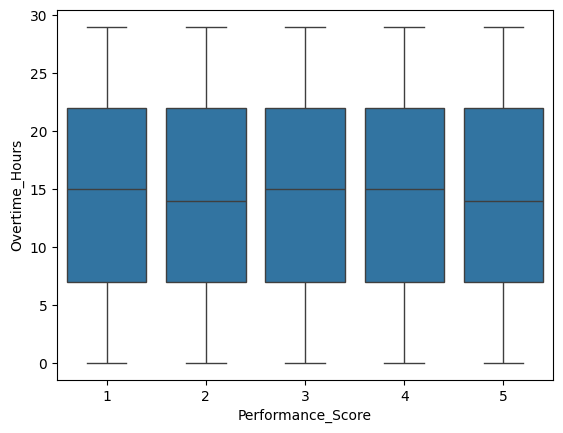

In [12]:
sns.boxplot(data=df, x="Performance_Score", y="Overtime_Hours")
plt.show()

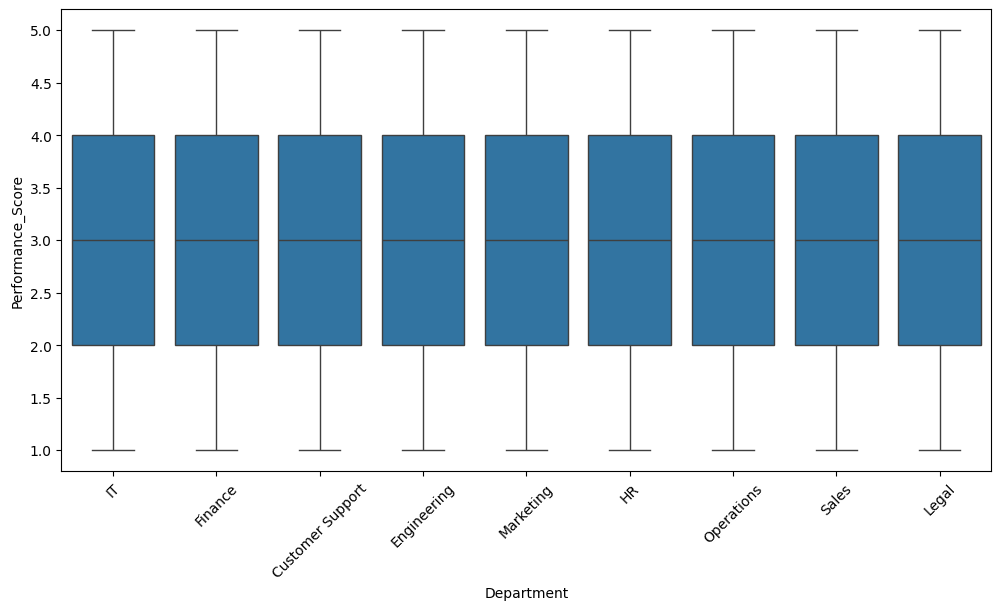

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Department", y="Performance_Score")
plt.xticks(rotation=45)
plt.show()

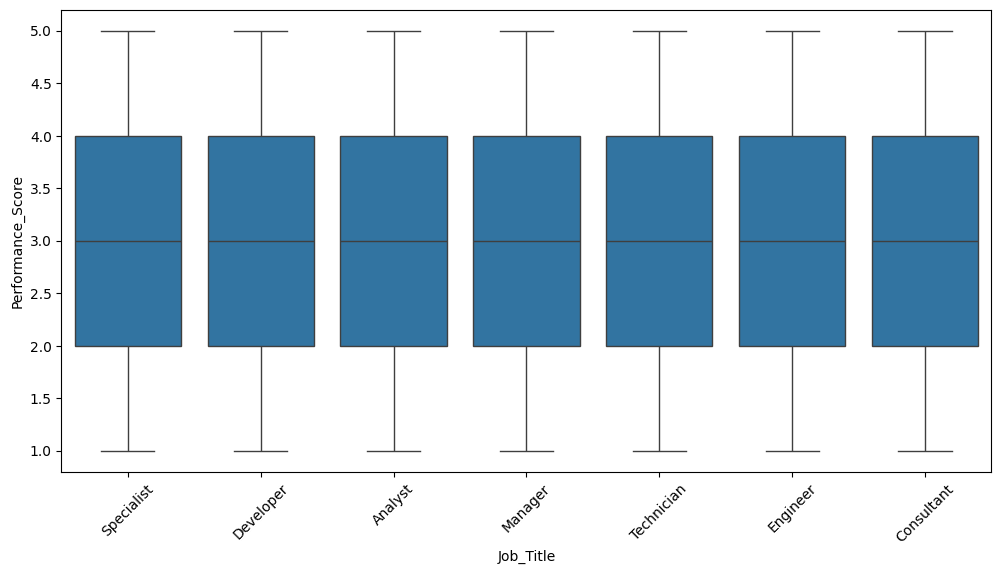

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Job_Title", y="Performance_Score")
plt.xticks(rotation=45)
plt.show()

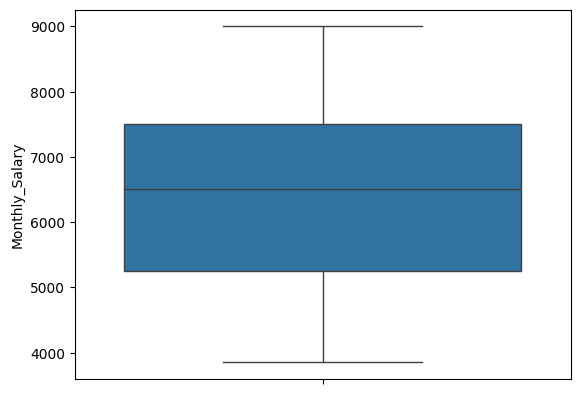

In [15]:
sns.boxplot(data=df, y="Monthly_Salary")
plt.show()

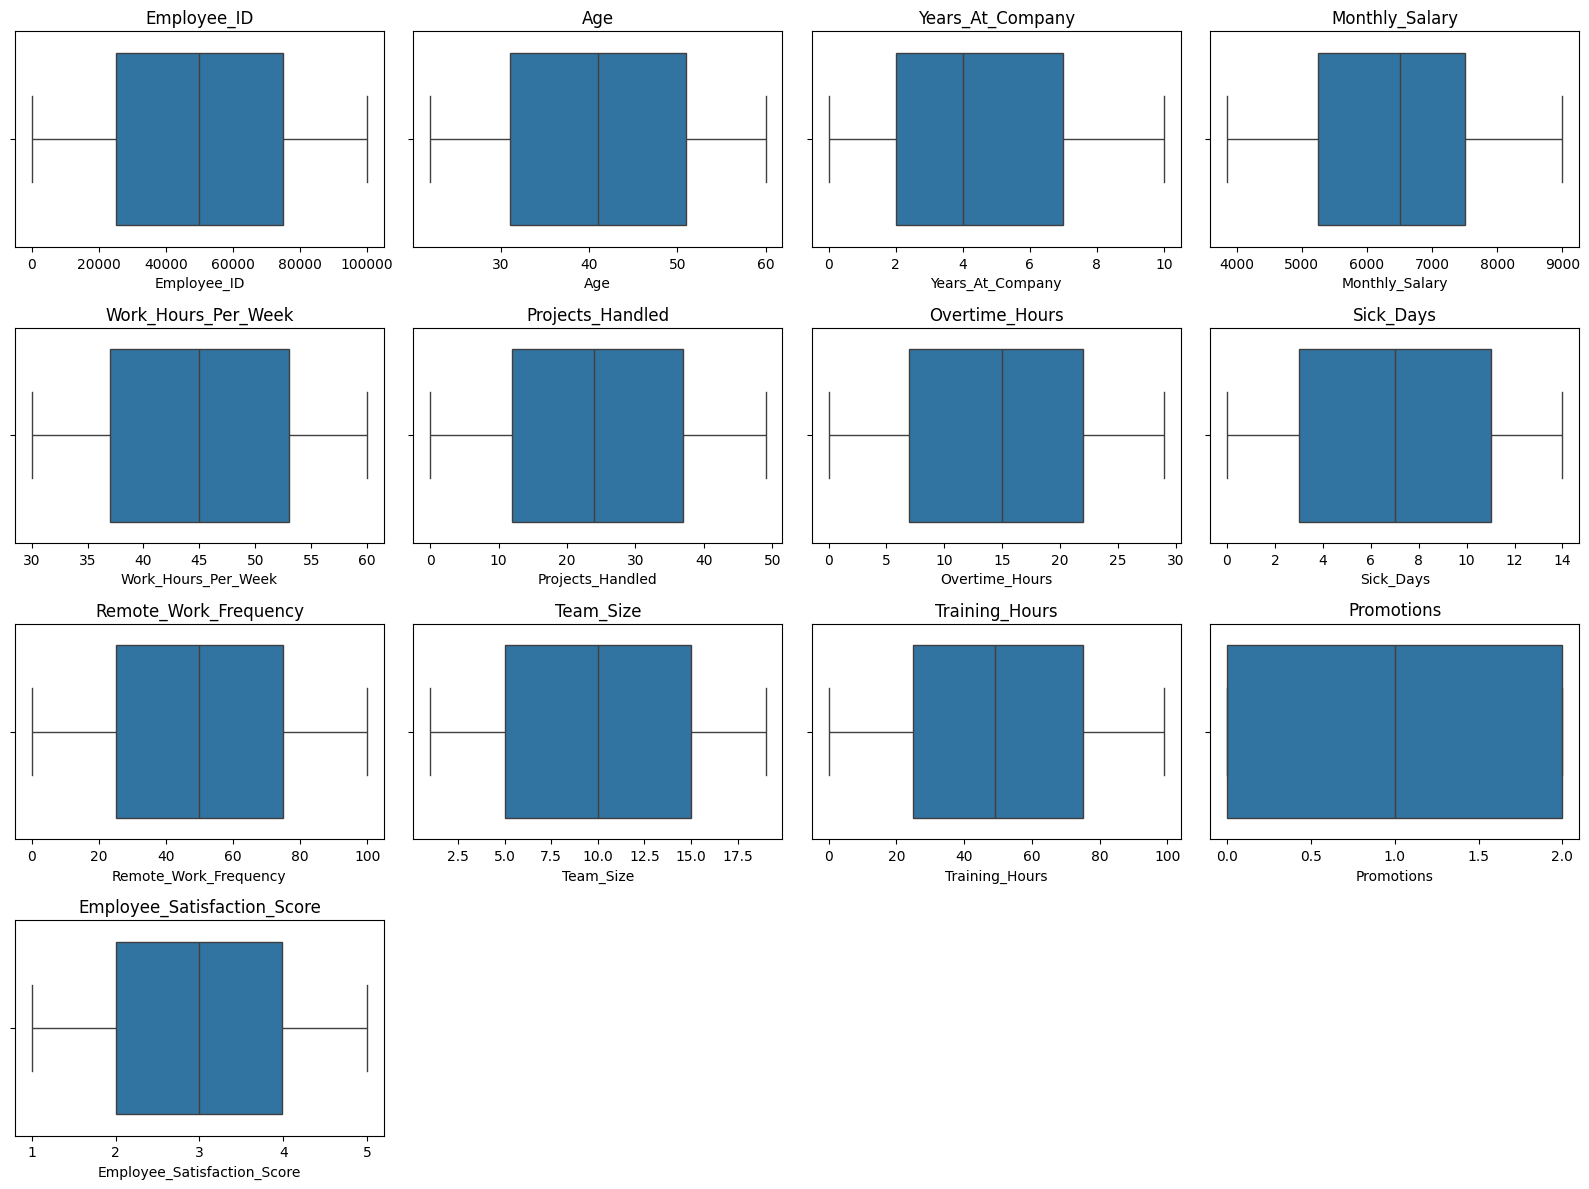

In [16]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop("Performance_Score")

n_plots = len(num_cols)
n_cols = math.ceil(math.sqrt(n_plots))
n_rows = math.ceil(n_plots / n_cols)

plt.figure(figsize=(4 * n_cols, 3 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [17]:
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

for col in num_cols:
    outliers = detect_outliers_iqr(col)
    print(f"{col}: {len(outliers)} outliers")

Employee_ID: 0 outliers
Age: 0 outliers
Years_At_Company: 0 outliers
Monthly_Salary: 0 outliers
Work_Hours_Per_Week: 0 outliers
Projects_Handled: 0 outliers
Overtime_Hours: 0 outliers
Sick_Days: 0 outliers
Remote_Work_Frequency: 0 outliers
Team_Size: 0 outliers
Training_Hours: 0 outliers
Promotions: 0 outliers
Employee_Satisfaction_Score: 0 outliers


In [18]:
df["Hire_Date"] = pd.to_datetime(df["Hire_Date"])
df["Hire_Year"] = df["Hire_Date"].dt.year
df = df.drop("Hire_Date", axis=1)

In [19]:
df = df.drop(["Employee_ID", "Resigned"], axis=1)

In [20]:
# ---------------------------------------------------
# 4) ADD NOISE to Performance_Score (IMPORTANT PART)
# ---------------------------------------------------
df["Performance_Score_orig"] = df["Performance_Score"].copy()

np.random.seed(42)
sigma = 1.0   # strong noise so model cannot be perfect
noise = np.random.normal(0, sigma, len(df))

# create NOSIY target
df["Performance_Score_noisy"] = (
    df["Performance_Score_orig"] + noise
).round().clip(1, 5).astype(int)

# Sanity check - Print changes
print("\nOriginal vs Noisy value counts:")
print("Original:", df["Performance_Score_orig"].value_counts().sort_index().to_dict())
print("Noisy   :", df["Performance_Score_noisy"].value_counts().sort_index().to_dict())

print("\nSample original vs noisy:")
print(df[["Performance_Score_orig", "Performance_Score_noisy"]].sample(10))



Original vs Noisy value counts:
Original: {1: 20120, 2: 20013, 3: 19999, 4: 19940, 5: 19928}
Noisy   : {1: 21567, 2: 18694, 3: 19801, 4: 18447, 5: 21491}

Sample original vs noisy:
       Performance_Score_orig  Performance_Score_noisy
45389                       3                        3
44479                       2                        1
55354                       5                        5
70969                       2                        1
95436                       3                        4
517                         1                        1
33214                       4                        4
65509                       2                        4
7227                        3                        3
96952                       1                        1


In [21]:
# -------------------------------
# 5) Define Target and Features
# -------------------------------
target = "Performance_Score_noisy"

X = df.drop(columns=[
    "Performance_Score_orig",
    "Performance_Score",
    "Performance_Score_noisy"
])

y = df[target]

In [22]:
# -------------------------------
# 6) Define Feature Types
# -------------------------------
categorical_features = ["Department", "Gender", "Job_Title", "Education_Level"]

numerical_features = [
    "Age", "Years_At_Company", "Monthly_Salary", "Work_Hours_Per_Week",
    "Projects_Handled", "Overtime_Hours", "Sick_Days", "Remote_Work_Frequency",
    "Team_Size", "Training_Hours", "Promotions", "Employee_Satisfaction_Score",
    "Hire_Year"
]

In [23]:
# -------------------------------
# 7) Preprocessor
# -------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

In [24]:
# -------------------------------
# 8) Split Data
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
# -------------------------------
# 9) Model Selection
# -------------------------------
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [26]:
# -------------------------------
# 10) Train Model
# -------------------------------
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [27]:
# -------------------------------
# 11) Evaluate Model
# -------------------------------
y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [28]:
print("\n---------------- RESULTS ----------------")
print("RMSE:", rmse)
print("R2 Score:", r2)


---------------- RESULTS ----------------
RMSE: 0.854308228188164
R2 Score: 0.6504901153976358


In [30]:
print("\n\n========== TRAINING SECOND MODEL FOR COMPARISON ==========\n")

from sklearn.ensemble import GradientBoostingRegressor

# Train GradientBoosting model using the same preprocessing
gb_model = GradientBoostingRegressor(random_state=42)

gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", gb_model)
])

# Train
gb_pipeline.fit(X_train, y_train)

# Predict
gb_pred = gb_pipeline.predict(X_test)




========== TRAINING SECOND MODEL FOR COMPARISON ==========



In [31]:
# Metrics
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_r2 = r2_score(y_test, gb_pred)

In [32]:
print("GradientBoosting RMSE:", gb_rmse)
print("GradientBoosting R2 Score:", gb_r2)

GradientBoosting RMSE: 0.8427297535061479
GradientBoosting R2 Score: 0.6598997594868643


In [33]:
print("\n\n============== MODEL PERFORMANCE COMPARISON ==============\n")
print(f"RandomForest     → RMSE: {rmse:.4f} | R²: {r2:.4f}")
print(f"GradientBoosting → RMSE: {gb_rmse:.4f} | R²: {gb_r2:.4f}")

print("\nBest model:", 
      "GradientBoosting" if gb_r2 > r2 else "RandomForest")



============== MODEL PERFORMANCE COMPARISON ==============

RandomForest     → RMSE: 0.8543 | R²: 0.6505
GradientBoosting → RMSE: 0.8427 | R²: 0.6599

Best model: GradientBoosting
